In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")

In [151]:
df = df.drop(columns=["Unnamed: 0"])

In [152]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [153]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), "not fire", "fire")

In [154]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [155]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [156]:
df.drop(columns=['month', 'day', 'year'], inplace=True)

In [157]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [158]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)


In [159]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [160]:
X = df.drop(columns=['FWI'])
y = df['FWI']

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [163]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((182, 11), (182,), (61, 11), (61,))

In [164]:
def find_corr(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [165]:
corr_feature = find_corr(X_train, 0.85)
corr_feature

{'BUI', 'DC'}

In [166]:
X_train = X_train

In [167]:
X_train.drop(corr_feature, axis=1, inplace=True)
X_test.drop(corr_feature, axis=1, inplace=True)

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LinearRegression()

Mean Squared Error: 0.6742766873791607
Mean Absolute Error: 0.5468236465249986
Score: 0.9839977157632893


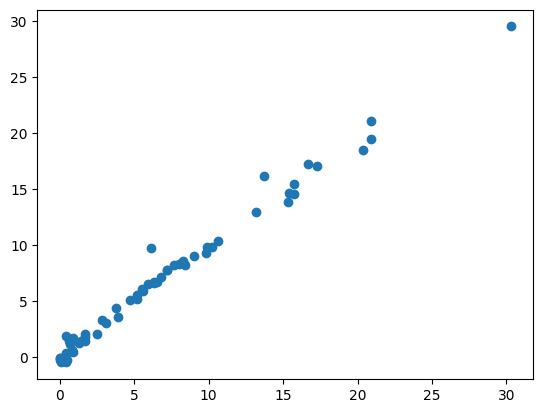

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
score = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Score: {score}")
plt.scatter(y_test, y_pred)


# Lasso 

Mean Squared Error: 2.2483458918974772
Mean Absolute Error: 1.133175994914409
Score: 0.926474232680569


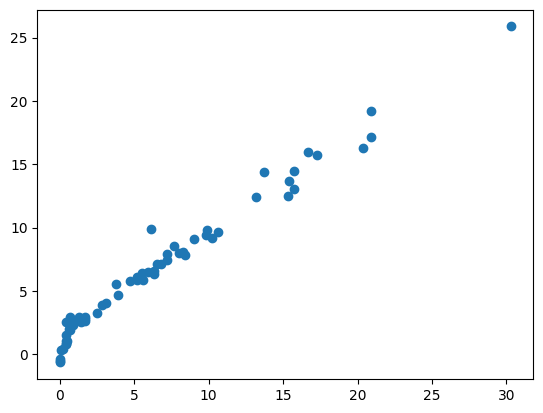

In [174]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lassoreg = Lasso()
lassoreg.fit(X_train_scaled, y_train)
y_pred = lassoreg.predict(X_test_scaled)
score = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Score: {score}")
plt.scatter(y_test, y_pred)

# Lasso CV

Mean Squared Error: 0.792499555474362
Mean Absolute Error: 0.619970115826343
Score: 0.980851982434192


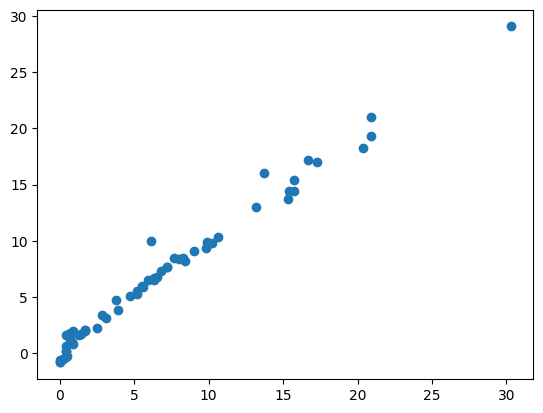

In [180]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
score = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Score: {score}")
plt.scatter(y_test, y_pred)

# Ridge

Mean Squared Error: 0.6949198918152074
Mean Absolute Error: 0.5642305340105692
Score: 0.9834070933284212


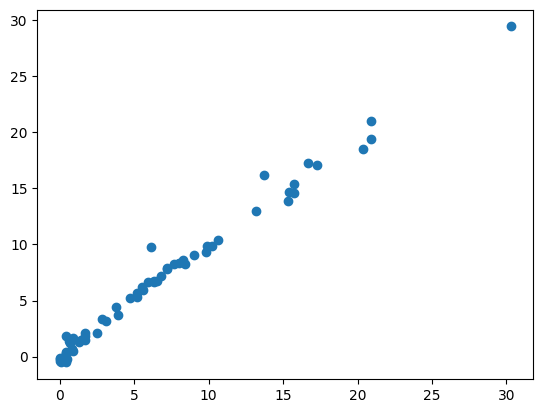

In [175]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ridgereg = Ridge()
ridgereg.fit(X_train_scaled, y_train)
y_pred = ridgereg.predict(X_test_scaled)
score = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Score: {score}")
plt.scatter(y_test, y_pred)

# Ridge CV

Mean Squared Error: 0.6949198918152074
Mean Absolute Error: 0.5642305340105692
Score: 0.9834070933284212


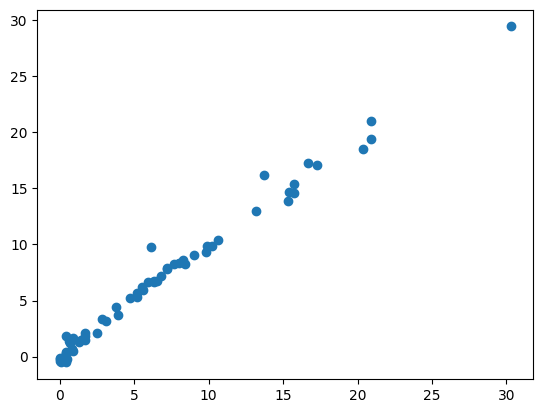

In [177]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
score = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Score: {score}")
plt.scatter(y_test, y_pred)

In [181]:
scaler

StandardScaler()

In [186]:
ridgereg

Ridge()

In [187]:
import pickle as pkl
pkl.dump(scaler, open('scaler.pkl', 'wb'))
pkl.dump(ridgereg, open('ridge.pkl', 'wb'))